# STA 141B Assignment 2

Due __Jan 29, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded for correctness.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using data frames to index, slice, reshape, aggregate, and group data.

## Indexing

__Exercise 1.1 (10 points).__ Give three examples of indexing a data frame with `[ ]`, `.loc[ ]`, and `.iloc[ ]`, respectively. Explain how each of these indexing methods is different.

In [5]:
import pandas as pd
import numpy as np

In [10]:
# Set my own data frame:
df1 = pd.DataFrame({'x':[1,2,3], 'y':["Monday",'Tuesday','Wednesday']})
# Change the index
df1.index = [2,3,'five']
df1


,x,y
2,1,Monday
3,2,Tuesday
five,3,Wednesday


In [11]:
# Index it with []
print(df1['x'])
print('\n')
# If index with [], then it will return to the columns have the value of the input


try:
    a = df1[1]
    print(a)
except KeyError:
    print('error')
print('\n')
# if the input is 1 which is a value, since there is no column named as '1', so the return is 
# error instead of returning to the column has the index of 1.

print(df1[df1['x']>1])
print(df1[0:2])
# But if the imput is a condition, then it will return to the rows that satisfy the condition



2       1
3       2
five    3
Name: x, dtype: int64


error


      x          y
3     2    Tuesday
five  3  Wednesday
   x        y
2  1   Monday
3  2  Tuesday


In [12]:
# Index with loc
print(df1.loc[2,:])
print('\n')
print(df1.loc[[2,'five'],:])
# By using df.loc, it actually do selection by label. That means it will always return to the 
# elements having the excatly same indexes as the input.

x         1
y    Monday
Name: 2, dtype: object


      x          y
2     1     Monday
five  3  Wednesday


In [13]:
df1.iloc[1,1]
# By using iloc, it will do the selection by position. That means it will always treat the input as
# the exact postion.

'Tuesday'

__Exercise 1.2 (10 points).__ What do negative indexes (as in `x[-1]`) do in Python? Create and try three examples of negative indexes for lists, NumPy arrays, and data frames, respectively. Then explain what you think negative indexes do. Confirm your explanation by linking to a relevant page in the Python, NumPy, or Pandas documentation.

In [14]:
# Negative indexes means count from the end.
ls1 = [1,2,3]
arr = pd.Series([1,2,3])
print(ls1[-1])
print('\n')
print(arr.iloc[-1])
print('\n')
print(df1.iloc[-1,:])

# https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html
# Section: Indexing/Selection

3


3


x            3
y    Wednesday
Name: five, dtype: object


__Exercise 1.3 (10 points).__ Give an example and explain Pandas' data alignment (or index alignment) feature.

In [15]:
arr2 = pd.Series([1,2,3],index = ['c','e', 'f'])
arr3 = pd.Series([2,7,9], index = ['f','c','e'])
print( arr2,'\n',arr3)

c    1
e    2
f    3
dtype: int64 
 f    2
c    7
e    9
dtype: int64


In [16]:
arr2*arr3
# Instead of multiplying the elements by the position, python will match the index name 
# automatically

c     7
e    18
f     6
dtype: int64

__Exercise 1.4 (10 points).__ Explain the difference between the similarly-named data frame methods `.reindex()` and `.reset_index()`. Give two examples to show what each method respectively does.

How might these methods be useful when combined with Pandas' data alignment feature?

*Hint: Besides the Pandas documentation, `.reindex()` is explained in Python for Data Analysis 5.2, and `.reset_index()` is explained [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html#Index-setting-and-resetting).*

In [17]:
df1.reset_index()
# By using obj.reset_index() methods, it will return to the new data frame with new sequential
# indices 

,index,x,y
0,2,1,Monday
1,3,2,Tuesday
2,five,3,Wednesday


In [18]:
df1.reindex(index = [3,2,'five'])
# By using .reindex method, user shoud specify the new sequence of the original indices and it will
# returns to the sorted data frame.


,x,y
3,2,Tuesday
2,1,Monday
five,3,Wednesday


## Aquaculture Data Set 🐟🦐

The U.S. Department of Agriculture publishes data sets about U.S. food production online. In the next few exercises, you'll use the [U.S. Aquaculture data set](https://www.ers.usda.gov/webdocs/DataFiles/47759/AquacultureTradeFull.xls?v=661.2). The data set contains information about fish and shellfish imports and exports (more info [here](https://www.ers.usda.gov/data-products/aquaculture-data/)). The data set is published as a single Excel file.

__Exercise 1.5 (20 points).__ Download the aquaculture data set, open it in your favorite spreadsheet program, and take a moment to familiarize yourself with the data.

Use Pandas to _read_ the sheet that contains total imports from the Excel file. Clean the data frame so that it's _tidy_ (more info [here](http://shzhangji.com/blog/2017/09/30/pandas-and-tidy-data/) and [here](https://www.jstatsoft.org/article/view/v059i10)). In particular, make sure that:

* years are in a single column
* measurements are in a single column
* all observations indicate whether they are value or volume
* fish type and preparation are in separate columns
* footnotes are removed

For example, after tidying the data, I ended up with a multiindex series that looked like:

```
measurement     product  format             year
volume_1000lbs  Trout     fresh and frozen  1989    1467.892443
                                            1990    5898.067124
                                            1991    3866.117733
                                            1992    6200.029791
                                            1993    4744.615508
                                            ...
dtype: float64
```

Your result does not have to be identical, but should have a similar shape. Your result can be a data frame with multiple columns, or a multiindex series.

Convert your code into a function `read_aqua_mx()` with appropriate documentation and parameters. Test that your function can also correctly read the total exports sheet.

In [6]:
def read_aqua_mx(file_name, sheet_number,skip_row, del_end,foot_notes ):

    '''
    This function is the function to read the data and tidy it.
    The file to be load should be excel file.
    
    Arguments:
    - file_name: the name of the file to be loaded.
    - sheet_number: The number of the sheet in the excel file to be read.
    - skip_row: number of rows to skip in the top of sheet.
    - del_end: number of rows to be removed from the bottom of the data
    - foot_notes: foot_notes in the data frame to be removed.
    '''
    # Read the dataset:
    aqua = (pd.read_excel(file_name, 
                          sheet_name = sheet_number,skiprows = skip_row))
    
    # Tidy the data:
    # - Delete useless rows
    aqua = aqua[:-del_end]

    # - Delete the footnotes
    aqua.iloc[:,1] = aqua.iloc[:,1].str.strip(foot_notes)

    # - Split product and its format
    aqua.insert(2,'format',aqua.loc[:,'Unnamed: 1'])
    c = aqua.loc[:,'Unnamed: 1'].str.split(',', n = 1,expand=True)
    aqua.loc[:,'format'] = c.iloc[:,1]
    aqua.loc[:,'Unnamed: 1'] = c.iloc[:,0]

    # - Rename the column
    aqua = aqua.rename(columns = {'Product':'Measurements', 'Unnamed: 1': 'Product'})
    aqua['Measurements']=aqua.iloc[:,0].str.replace('\\n','_')
    aqua['Measurements'][0:14] = 'Volume_1,000 pounds'
    aqua['Measurements'][14:30] = 'Value_1,000 U.S.dollars'
    
    # Stack:
    aqua = aqua.set_index(['Measurements','Product','format'])
    aqua = aqua.stack()
    aqua.index = aqua.index.rename('year',level = 3)
    return aqua


# Test the function:
(read_aqua_mx('AquaCultureTradeFull.xls', sheet_number=1,skip_row=1, del_end=3, 
              foot_notes = '/' ).head())
(read_aqua_mx('AquaCultureTradeFull.xls', sheet_number=2,skip_row=1, del_end=3, 
              foot_notes = '/' ).head())
# Works as expected.





C:\Users\RockyYin\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\RockyYin\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Measurements         Product  format             year
Volume_1,000 pounds  Trout     fresh and frozen  1989     806.814490
                                                 1990    1855.083591
                                                 1991    1628.887169
                                                 1992    1635.767795
                                                 1993    1843.257999
dtype: float64

__Exercise 1.6 (20 points).__ What kind of fish or shellfish did the U.S. import the most of in 2017, and how much was imported? What was the total value of the most imported fish or shellfish, and was its value highest across all imports in 2017?

Was the most imported fish or shellfish different in previous years?

In [7]:
dt = (read_aqua_mx('AquaCultureTradeFull.xls', sheet_number=1,skip_row=1, 
                       del_end=3, foot_notes = '/' ))

# Transform back the data:
dt = dt.reset_index()
# Rename the column:
dt = dt.rename(columns = {0:'Value'})

def most_in(y):
    '''
    dt is the dataframe.
    y is the year to be look up
    y shoud be string
    return to the row of the most import product of the year
    
    '''
    # Slice the data:
    df1 = dt[dt['Measurements'] == 'Volume_1,000 pounds']
    df2 = df1[df1['year'] == y]
    
    return df2.loc[df2['Value'].idxmax(),:]

most_in(y = '2017')





C:\Users\RockyYin\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\RockyYin\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Measurements    Volume_1,000 pounds
Product                      Shrimp
format                       frozen
year                           2017
Value                   1.13962e+06
Name: 266, dtype: object

**So the most import in 2017 is frozen shrimp. The total value in pounds(1,000) is 1.13962e+06.**

In [8]:
temp = dt.loc[dt['Measurements'] == 'Volume_1,000 pounds',]
temp.groupby(['Product','format'])['Value'].sum()
# So the most impoted fish in total is frozen shrimp as well whether consider the format or not.

Product          format                
Atlantic salmon   fillets                  5.916735e+06
                  fresh                    4.439460e+06
                  frozen                   2.015549e+05
Pacific salmon    fresh 1                  7.894333e+05
                  frozen 1                 1.326095e+06
Salmon            canned and prepared 2    5.757382e+05
Shrimp            fresh and prepared 4     6.189232e+06
                  frozen                   2.404346e+07
Trout             fresh and frozen         3.666906e+05
Name: Value, dtype: float64

In [9]:
shrimp = dt[dt['Product']=='Shrimp']
shrimp_vol = shrimp[shrimp['Measurements'] == 'Volume_1,000 pounds']
shrimp_vol.sort_values('Value', ascending = False).iloc[0,:]
# the import quantity in 2017 is the largest

Measurements    Volume_1,000 pounds
Product                      Shrimp
format                       frozen
year                           2017
Value                   1.13962e+06
Name: 266, dtype: object

In [11]:
dt.loc[dt.groupby(['Measurements','year'])['Value'].idxmax(),['Measurements','year','Product']]
# Seems they are not changing no matter in volume or in value.

,Measurements,year,Product
539,"Value_1,000 U.S.dollars",1989,Shrimp
540,"Value_1,000 U.S.dollars",1990,Shrimp
541,"Value_1,000 U.S.dollars",1991,Shrimp
542,"Value_1,000 U.S.dollars",1992,Shrimp
543,"Value_1,000 U.S.dollars",1993,Shrimp
544,"Value_1,000 U.S.dollars",1994,Shrimp
545,"Value_1,000 U.S.dollars",1995,Shrimp
546,"Value_1,000 U.S.dollars",1996,Shrimp
547,"Value_1,000 U.S.dollars",1997,Shrimp
548,"Value_1,000 U.S.dollars",1998,Shrimp


__Exercise 1.7 (20 points).__ Repeat the analysis from Exercise 1.6 for exports.

Are there any fish or shellfish that the U.S. imports and also exports?

In [12]:
dt2 = read_aqua_mx('AquaCultureTradeFull.xls', sheet_number=2,skip_row=1, del_end=3, foot_notes = '/' )

# Transform back the data:
dt2 = dt2.reset_index()
# Rename the column:
dt2 = dt2.rename(columns = {0:'Value'})

def most_in(y):
    '''
    dt is the dataframe.
    y is the year to be look up
    y shoud be string
    return to the name of the most import product
    
    '''
    # Slice the data:
    df1 = dt2[dt2['Measurements'] == 'Volume_1,000 pounds']
    df2 = df1[df1['year'] == y]
    
    return df2.loc[df2['Value'].idxmax(),:]

most_in(y = '2017')

C:\Users\RockyYin\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\RockyYin\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Measurements    Volume_1,000 pounds
Product              Pacific salmon
format                     frozen 1
year                           2017
Value                        427477
Name: 150, dtype: object

So the most export in 2017 is Pacific salmon, and the format is frozen 1.The quantity is 427477

In [13]:
temp2 = dt2.loc[dt2['Measurements'] == 'Volume_1,000 pounds',]
temp2.groupby(['Product','format'])['Value'].sum()

Product          format                
Atlantic salmon   fresh                    1.176304e+06
                  frozen                   1.166402e+04
Pacific salmon    fresh 1                  7.866299e+05
                  frozen 1                 8.000429e+06
Salmon            canned and prepared 2    3.249099e+06
Shrimp            fresh and prepared 3     4.192625e+05
                  frozen                   3.880671e+05
Trout             fresh and frozen         1.671741e+05
Name: Value, dtype: float64

**So the most exported fish in total is pacific salmon whether consider the format or not.**

In [14]:
pac = dt2[dt2['Product']=='Pacific salmon']
pac_vol = pac[pac['Measurements'] == 'Volume_1,000 pounds']
pac_vol.sort_values('Value', ascending = False).iloc[0,:]


Measurements    Volume_1,000 pounds
Product              Pacific salmon
format                     frozen 1
year                           2017
Value                        427477
Name: 150, dtype: object

**The export quantity in 2017 is the largest as well.**

In [15]:


(dt2.loc[dt2.groupby(['year','Measurements'])['Value'].idxmax(),
         ['Measurements','year','Product','Value']])


,Measurements,year,Product,Value
492,"Value_1,000 U.S.dollars",1989,Pacific salmon,684311.391000
122,"Volume_1,000 pounds",1989,Pacific salmon,298450.200596
493,"Value_1,000 U.S.dollars",1990,Pacific salmon,627822.623000
123,"Volume_1,000 pounds",1990,Pacific salmon,286111.096609
494,"Value_1,000 U.S.dollars",1991,Pacific salmon,406119.213000
124,"Volume_1,000 pounds",1991,Pacific salmon,240298.881693
495,"Value_1,000 U.S.dollars",1992,Pacific salmon,633494.176000
125,"Volume_1,000 pounds",1992,Pacific salmon,279841.729252
496,"Value_1,000 U.S.dollars",1993,Pacific salmon,534045.874000
126,"Volume_1,000 pounds",1993,Pacific salmon,302896.164780


 Seems it will change in some year in value, but in most years the quantity of exported Pacific Salmon is largest. But if counted in volume, it will always be pacific salmon.

In [23]:
name_impo = dt2['Product']
name_impo = name_impo.value_counts().reset_index()
name_expo = dt['Product']
name_expo = name_expo.value_counts().reset_index()
name_impo['value'] = 1
name_expo['value'] = 1
name_impo = name_impo.set_index('index')
name_expo = name_expo.set_index('index')
name_impo['value']*name_expo['value']



index
Atlantic salmon    1.0
Clams 4            NaN
Clams 5            NaN
Mussels 4          NaN
Mussels 5          NaN
Ornamental fish    NaN
Oysters 4          NaN
Oysters 5          NaN
Pacific salmon     1.0
Salmon             1.0
Scallops 4         NaN
Scallops 5         NaN
Shrimp             1.0
Tilapia 3          NaN
Trout              1.0
Name: value, dtype: float64

**By making use of python allignment fueature, it can be seen products that are both imported and exported are:**

- Atlantic salmon
- Pacific salmon
- Salmon
- Shrimp
- Trout

__Exercise 1.8 (20 points).__ What are the top five countries the U.S. imported shrimp from in 2017? _You'll need to read another sheet from the data set for this question._

Use a chart to show how volume imported has changed over the years for all countries that have ever been a top five source of shrimp.

In [35]:
shrimp2= (pd.read_excel('AquaCultureTradeFull.xls', sheet_name = 'Shrimp_Q_Yearly-Full',
                       skiprows = 2))
shrimp2 = shrimp2.rename(columns={'Product, country code, and name 1/':'Type',
                                'Unnamed: 1': 'Country code','Unnamed: 2': 'Name'})

idx = shrimp2[shrimp2['Type']=='Frozen'].index.tolist()[0]
shrimp2 = shrimp2.iloc[0:idx-1, :]
shrimp2['Type'] = 'Total'

shrimp2 = shrimp2.set_index(['Type','Country code','Name'])
shrimp2.head(10)

shrimp17 = shrimp2['2017']
shrimp17.reset_index().sort_values('2017', ascending = False).head(5)

,Type,Country code,Name,2017
2,Total,5330.0,India,471734.570061
3,Total,5600.0,Indonesia,260272.340339
0,Total,5490.0,Thailand,165282.568252
1,Total,3310.0,Ecuador,158315.420395
5,Total,5520.0,Vietnam,123659.018291


In [36]:
shrimp2_stack= shrimp2.stack()
shrimp2_stack.index= shrimp2_stack.index.rename('year',level = 3)
shrimp2 = shrimp2_stack.reset_index()

In [98]:
shrimp2 = shrimp2.rename(columns = {0: 'value'})
shrimp2['Country code'] = shrimp2['Country code'].astype(int)

In [125]:
# Define a function to get top5 country by measuring value in a given data set. 
def top5(df):
    temp = df
    temp = temp.sort_values('value',ascending = False)
    return temp.head(5)
top5(shrimp2)


# Get top5 of each year
tp5 = shrimp2.groupby('year').apply(top5)
tp5



Type  Country code              Name        year  \
year                                                                
1989       124  Total          5700  China (Mainland)        1989   
           31   Total          3310           Ecuador        1989   
           181  Total          2010            Mexico        1989   
           0    Total          5490          Thailand        1989   
           62   Total          5330             India        1989   
1990       125  Total          5700  China (Mainland)        1990   
           32   Total          3310           Ecuador        1990   
           1    Total          5490          Thailand        1990   
           182  Total          2010            Mexico        1990   
           63   Total          5330             India        1990   
1991       33   Total          3310           Ecuador        1991   
           2    Total          5490          Thailand        1991   
           126  Total          5700  China (Mainland)        1991   
           64   Total          5330             India        1991   
           183  Total          2010            Mexico        1991   
1992       34   Total          3310           Ecuador        1992   
           3    Total          5490          Thailand        1992   
           127  Total          5700  China (Mainland)        1992   
           65   Total          5330             India        1992   
           96   Total          5600         Indonesia        1992   
1993       4    Total          5490          Thailand        1993   
           35   Total          3310           Ecuador        1993   
           128  Total          5700  China (Mainland)        1993   
           185  Total          2010            Mexico        1993   
           66   Total          5330             India        1993   
1994       5    Total          5490          Thailand        1994   
           36   Total          3310           Ecuador        1994   
           186  Total          2010            Mexico        1994   
           129  Total          5700  China (Mainland)        1994   
           67   Total          5330             India        1994   
...               ...           ...               ...         ...   
2014       87   Total          5330             India        2014   
           118  Total          5600         Indonesia        2014   
           56   Total          3310           Ecuador        2014   
           175  Total          5520           Vietnam        2014   
           25   Total          5490          Thailand        2014   
2015       88   Total          5330             India        2015   
           119  Total          5600         Indonesia        2015   
           57   Total          3310           Ecuador        2015   
           26   Total          5490          Thailand        2015   
           176  Total          5520           Vietnam        2015   
2016       89   Total          5330             India        2016   
           120  Total          5600         Indonesia        2016   
           27   Total          5490          Thailand        2016   
           58   Total          3310           Ecuador        2016   
           177  Total          5520           Vietnam        2016   
2017       90   Total          5330             India        2017   
           121  Total          5600         Indonesia        2017   
           28   Total          5490          Thailand        2017   
           59   Total          3310           Ecuador        2017   
           178  Total          5520           Vietnam        2017   
Jan-Oct 17 91   Total          5330             India  Jan-Oct 17   
           122  Total          5600         Indonesia  Jan-Oct 17   
           60   Total          3310           Ecuador  Jan-Oct 17   
           29   Total          5490          Thailand  Jan-Oct 17   
           179  Total          5520           Vietnam  Jan-Oct 17   
Jan-Oct 18 92  

In [100]:
# Get their names:
name2 = (tp5['Name'].value_counts().reset_index().
         rename(columns = {'index': 'Country', 'Name':'Frequency'}))
names = name2['Country'].astype(str)
names
    

0            Thailand
1             Ecuador
2               India
3    China (Mainland)
4           Indonesia
5             Vietnam
6              Mexico
Name: Country, dtype: object

In [106]:
# Get the dataframe of the countries listed above

# Initialize the dataframe:
yearly5 = pd.DataFrame([])

# Using a loop to get each part of the data and put them together:

for n in names:
    yearly5 = yearly5.append(shrimp2[shrimp2['Name']== n])

yearly5.head()

,Type,Country code,Name,year,value
0,Total,5490,Thailand,1989,48587.027122
1,Total,5490,Thailand,1990,55903.067434
2,Total,5490,Thailand,1991,100290.044933
3,Total,5490,Thailand,1992,118873.588616
4,Total,5490,Thailand,1993,147383.023977


In [111]:
# Visualize the data:
from plotnine import *

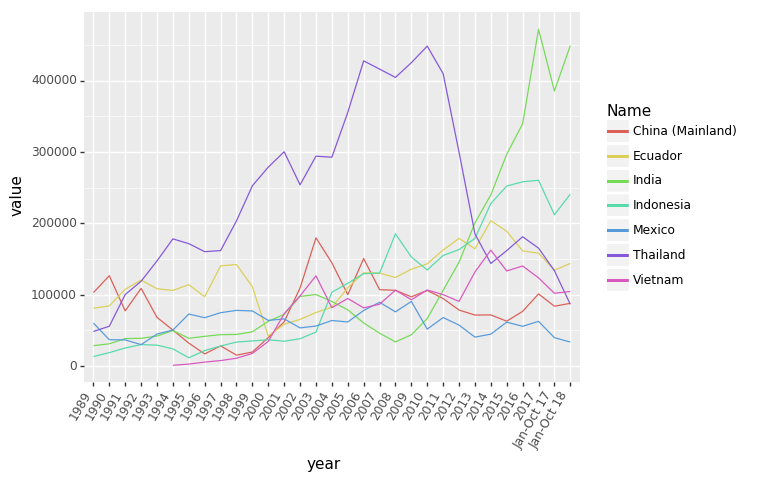

<ggplot: (137534202418)>

In [124]:
(ggplot(yearly5) + geom_line(aes(x = 'year', y = 'value',group = 'Name',color = 'Name'))+
    theme(axis_text_x=element_text(rotation=60, hjust=1)))

## Conclusion:

### Top 5 countries in 2017
Accoding to the chart, in 2017, top 5 countries import most shrimp are:
1. India
2. Indonesia
3. Thailand
4. Ecuador
5. Vietnam


### Countries ever been in top 5 in history:
So countries that ever in the top 5 are:
1. Thailand
2. Ecuador
3. India
4. China(Mainland)
5. Indonesia
6. Vietnam
7. Mexico


### Trend of the countries:
From the figure, we can see the total volume exported to India has dramatically grow. On the contrary, value of Thailand kept growing before 2011 but dropped significantly after that. The rest countries stay more stable compared to India and Thailand. They flactuate by years but they don't change a lot in adjacent years